In [ ]:
# Importing all the modules that we're going to use

import tweepy
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import re
import json
import nltk
from nltk.corpus import stopwords

import datetime
from PIL import Image 

import matplotlib
import matplotlib.pyplot as plt

# 1 ) Geeting the streming tweets

In [ ]:
# API credential 

consumerKey = 'cuTAcXKYLVStp3oeeQB0jC00Y'
consumerSecret = 'A3IuDS3AULUxDcIFBXl8uxhSMge0ujvLfQxTd3MLeLzwJ1t5e5'
accessToken = '1228277127344279554-lyO3iok2TTjYq6Bc5c864RUqDRDlsu'
accessTokenSecret = 'fXFnpXnK1NrXGz0HJy6HUMzpHCkEv4iRKOMzj5tZmOKRY'

In [ ]:
# Authentication object
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Setting the access token and access token secret
auth.set_access_token(accessToken, accessTokenSecret)

# Creating the API object. We pass the authentication object.
# With wait_on_rate_limit = True, if you reach the limit of tweets read, it waits until you can continue
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
# Getting the tweets in streaming 

tweets = [] # Empty list to save the read tweets
created_at_list = []
run_time = datetime.datetime.now() + datetime.timedelta(hours=2)
screen_names = []
ids = []

# Define the time when you start to run this code (time_start) and when you are going to stop (time_end)
# Note: If you are in summer time, we have to include 2 hours, if not, comment # + datetime.timedelta(hours=2)
time_start = pd.to_datetime('2021-06-16 10:33:00+0000') + datetime.timedelta(hours=2)
time_end = pd.to_datetime('2021-06-16 10:35:00+0000') + datetime.timedelta(hours=2)
class TweetsListener(tweepy.StreamListener): # This class inherits from tweepy.StreamListener
  
    def on_connect(self):
        print("I'm connected") # Message to be displayed when the connection starts
        
    def on_data(self,data): 
        
      global time_start
      global time_end  

      try:
        created_at = pd.to_datetime(json.loads(data)['created_at']) + datetime.timedelta(hours=2)
      except:
        created_at = np.nan

      if (created_at<time_start):
        print(created_at)
        print(time_start)
        print('Not yet')

      elif (created_at >= time_start) & (created_at<=time_end): # if actual time is between time_star and time_stop, we get the tweets
        
        try:

          text = json.loads(data)['text'] # Getting tweet text
          text = re.sub(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)', 'MENCION',text) # Removing @mentions
          text = re.sub(r'#','',text) # Removing the '#' symbol
          text = re.sub(r':','',text) # Removing the ':' symbol
          text = re.sub(r'RT[\s]+','',text) #Removing the 'RT' word
          text = re.sub(r"http\S+",'ENLACE',text) #Removing hyperlinks
          emoji = re.compile("["
              u"\U0001F600-\U0001F64F"  
              u"\U0001F300-\U0001F5FF"  
              u"\U0001F680-\U0001F6FF"  
              u"\U0001F1E0-\U0001F1FF"  
              u"\U00002500-\U00002BEF"  
              u"\U00002702-\U000027B0"
              u"\U00002702-\U000027B0"
              u"\U000024C2-\U0001F251"
              u"\U0001f926-\U0001f937"
              u"\U00010000-\U0010ffff"
              u"\u2640-\u2642" 
              u"\u2600-\u2B55"
              u"\u200d"
              u"\u23cf"
              u"\u23e9"
              u"\u231a"
              u"\ufe0f"  
              u"\u3030"
                            "]+", re.UNICODE) 
          text = re.sub(emoji, '', text) # Removing emoticons
          
          print(text) # Printing the tweets' text
          
          try:
            screen_name = json.loads(data)['user']['screen_name'] # Getting the screen name
          except:
            screen_name = np.nan

          print(created_at)

          try:
            id = json.loads(data)['id']
          except:
            id = np.nan

          global tweets
          
          tweets.append(text) # Appending the tweet text to tweets list
          
          global screen_names
          
          screen_names.append(screen_name) # Appending the screen name

          global created_at_list
          
          created_at_list.append(created_at) # Appending the created at          
          
          global ids

          ids.append(id) # Appending the tweet text to tweets list   
          global run_time



          d = {'ID':ids,'Text':tweets,'Created time':created_at_list,'Screen name':screen_names,'Run time':run_time} # Declaring the variable d to later create the dataframe

          global df
          
          df = pd.DataFrame(data=d) # Creating the df dataframe with the Tweets column containing all the tweets' texts

        except:
            print('An error occurred while reading this tweet') # Message to be displayed when there is an error reading tweets data
      else:
        print('End')
        
    def on_error(self,status_code):
        print("Error",status_code) # Message to be displayed when there is an error
        
stream = TweetsListener() # Creating an instance of TweetsListener()
streamingApi = tweepy.Stream(auth=api.auth,listener=stream) 


# streamingApi.filter(track=['Trump']) # Example of filter 'Trump'--> It could be useful if there is a controversial issue

# Define the locations of interest 
españa = (-7.3020773834,35.9456058548,4.6256198979,43.6067257271)
galicia = (-9.3723347522,41.8473569049,-6.1494134623,43.8631287919)
canarias = (-18.2571112753,27.5377487071,-13.3342440189,29.3572440098)
#aragon = (-1.9954655388,40.2740375036,0.1709293675,42.6553366557)

# Apply the filter to the locations 
streamingApi.filter(locations = españa)
streamingApi.filter(locations = galicia)
streamingApi.filter(locations = canarias)

# Now we only have to run the script when the XXXXX starts and we will stop it when it ends.

I'm connected
End
End
End
End


KeyboardInterrupt: ignored

In [ ]:
# See the new df 
df.head()

,ID,Text,Created time,Screen name,Run time
0,1405111160731545602,Gracias MENCIÓN MENCIÓN MENCIÓN por este capít...,2021-06-16 12:33:01+00:00,saratab,2021-06-16 12:32:30.795555
1,1405111168046338049,MENCIÓN Jajajajjajajajajajajajajajajaja,2021-06-16 12:33:02+00:00,manuelRM_6,2021-06-16 12:32:30.795555
2,1405111172177801220,Mañana juega Bélgica de los cojones y me lo vo...,2021-06-16 12:33:03+00:00,DiosChotil,2021-06-16 12:32:30.795555
3,1405111178423058433,temacabezasrubias temabartrastero temaandévalo...,2021-06-16 12:33:05+00:00,ANHAGA53,2021-06-16 12:32:30.795555
4,1405111179056496644,"MENCIÓN Creo que esta vez , no solo depende de...",2021-06-16 12:33:05+00:00,MIDDEMCAMP,2021-06-16 12:32:30.795555
...,...,...,...,...,...
98,1405111649695145990,MENCIÓN MENCIÓN A tope Gorka! Enhorabuena! Gra...,2021-06-16 12:34:57+00:00,manumgar86,2021-06-16 12:32:30.795555
99,1405111655504228354,Nadal juega a la petanca,2021-06-16 12:34:59+00:00,SaulYedrero,2021-06-16 12:32:30.795555
100,1405111659505586178,MENCIÓN La mosca negra es molt petita pero fa ...,2021-06-16 12:34:59+00:00,falduko,2021-06-16 12:32:30.795555
101,1405111661300699142,MENCIÓN MENCIÓN Esto no puede ser verdad.,2021-06-16 12:35:00+00:00,mmaaleena,2021-06-16 12:32:30.795555


In [ ]:
# Save df Tweets in streaming to csv 
df.to_csv(r'/content/tweets_stream.csv', index = False) 

# 2 ) LOAD TWEETS AND APPLY THE MODEL





In [ ]:
!pip install -q datasets
!pip install -q transformers

In [ ]:
from datasets import load_dataset
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
from datasets import Dataset


In [ ]:
from google.colab import drive
import os 

drive.mount('/content/drive') # to connect to our drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/tweets_stream.csv')
df.head()

,ID,Text,Created time,Screen name,Run time
0,1405101850387521539,MENCIÓN Me temo que de la Kitchen nos estamos ...,2021-06-16 11:56:01+00:00,RaulGuzzoConteG,2021-06-16 11:55:44.050461
1,1405101856192401413,MENCIÓN MENCIÓN JAJAJAJAJAJA,2021-06-16 11:56:02+00:00,paumolla02,2021-06-16 11:55:44.050461
2,1405101876744425474,@1777_1815_1865 MENCIÓN MENCIÓN Ce n est pas l...,2021-06-16 11:56:07+00:00,pesiss,2021-06-16 11:55:44.050461
3,1405101878057259009,MENCIÓN MENCIÓN Siiii en mi corazón temalomejo...,2021-06-16 11:56:07+00:00,GemaBallestero5,2021-06-16 11:55:44.050461
4,1405101880376705026,Es amiguito de quién le paga más.,2021-06-16 11:56:08+00:00,margaser1,2021-06-16 11:55:44.050461


In [ ]:
column_names = list(df.columns)
print(column_names) 

['ID', 'Text', 'Created time', 'Screen name', 'Run time']


In [ ]:
# Load the csv as Dataset instead of DataFrame. We need this type of dataset to use the module Transformers

data = load_dataset('csv', data_files ='/content/tweets_stream.csv', column_names = column_names, skiprows = 1)
data_train = data['train']

Using custom data configuration default-346d498a2d0dd801
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-346d498a2d0dd801/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0)


In [ ]:
data_train

Dataset({
    features: ['ID', 'Text', 'Created time', 'Screen name', 'Run time'],
    num_rows: 104
})

In [ ]:
# If you are not sure where is your model, you can look for it using de module os

# os.chdir('/content/drive/My Drive/HATEBLOCKERS/distill_bnaice_model')
# os.getcwd()
# !pwd


'/content'

In [ ]:
# Import the model

for dirname, _, filenames in os.walk('/content/drive/MyDrive/HATEBLOCKERS'):
    for filename in filenames:
        print("Directory path: ", os.path.join(dirname, filename))
        print("Folder name: ", dirname)
        print("File name: ", filename)

model = AutoModelForSequenceClassification.from_pretrained('/content/drive/My Drive/HATEBLOCKERS/distill_bnaice_model')

# model = AutoModelForSequenceClassification.from_pretrained('/content/drive/My Drive/ the folfer where is your model ')

Directory path:  /content/drive/MyDrive/HATEBLOCKERS/twitter-sentiment-extaction-analysis-eda-and-model.ipynb
Folder name:  /content/drive/MyDrive/HATEBLOCKERS
File name:  twitter-sentiment-extaction-analysis-eda-and-model.ipynb
Directory path:  /content/drive/MyDrive/HATEBLOCKERS/Twitter Sentiment Extaction - Analysis, EDA and Model.ipynb
Folder name:  /content/drive/MyDrive/HATEBLOCKERS
File name:  Twitter Sentiment Extaction - Analysis, EDA and Model.ipynb
Directory path:  /content/drive/MyDrive/HATEBLOCKERS/TEMA 1_ INTRODUCCIÓN ML.pdf
Folder name:  /content/drive/MyDrive/HATEBLOCKERS
File name:  TEMA 1_ INTRODUCCIÓN ML.pdf
Directory path:  /content/drive/MyDrive/HATEBLOCKERS/Curso Neural Network y Deep LEARNING.pdf
Folder name:  /content/drive/MyDrive/HATEBLOCKERS
File name:  Curso Neural Network y Deep LEARNING.pdf
Directory path:  /content/drive/MyDrive/HATEBLOCKERS/DATABASE_KAGGLE.ipynb
Folder name:  /content/drive/MyDrive/HATEBLOCKERS
File name:  DATABASE_KAGGLE.ipynb
Directo

## 2.1) New tweets


1.   Tokenization
2.   Cleaning
3.   Activation Function: Softmax
4.   Apply Model



In [ ]:
# Select the tokenizer 

tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

In [ ]:
# Clean the tweets

def clean_text(example):

  def cleaning_function(text):
    text_processed = text
    text_processed = re.sub('https:\/\/t\.co\/[a-zA-Z0-9]+','ENLACE',text_processed)
    text_processed = re.sub('@(\w){1,15}','usuario', text_processed)
    text_processed = re.sub('#[a-zA-Z0-9]+','tema ', text_processed)
    text_processed = re.sub(r"http\S+",'',text_processed) #Removing hyperlinks
    text_processed = re.sub(r'RT[\s]+','',text_processed) #Removing the 'RT' word
    text_processed = re.sub(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)', 'MENCION',text_processed) # Removing @mentions
    text_processed = re.sub(r'#','',text_processed) # Removing the '#' symbol
    text_processed = re.sub(r':\)','',text_processed) # Removing the ':)'
    text_processed = re.sub(r':-\)','',text_processed) # Removing the ':-)'
    text_processed = re.sub(r':\(','',text_processed) # Removing the ':('
    text_processed = re.sub(r':-\(','',text_processed) # Removing the ':-('
    text_processed = re.sub(r':','',text_processed) # Removing the ':' symbol
    pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text_processed = pattern.sub(r'EMOJI',text_processed)
    return text_processed
  
  texts_cleaned = []
  for text in example['Text']:
    texts_cleaned.append(cleaning_function(text))
  return {'Text':texts_cleaned}


data_train = data_train.map(clean_text, batched=True)
data = data.map(clean_text, batched=True)

Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-346d498a2d0dd801/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0/cache-25c2c09dbfaae790.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-346d498a2d0dd801/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0/cache-25c2c09dbfaae790.arrow


In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["Text"], padding="max_length", truncation=True)

data_train = Dataset.from_dict(data_train[:])
tokenized_datasets = data_train.map(tokenize_function, batched=True)


# In case there is too much data, try with a subsample of the dataset 

#subsample = 2000
#data_train = Dataset.from_dict(data_train[:subsample])


In [ ]:
tokenized_datasets

Dataset({
    features: ['Created time', 'ID', 'Run time', 'Screen name', 'Text', 'attention_mask', 'input_ids', 'token_type_ids'],
    num_rows: 104
})

In [ ]:
def softmax(x):
  return np.exp(x)/sum(np.exp(x))

def apply_model(x):
  inputs = tokenizer(x, return_tensors="pt") 
  outputs = model(**inputs)
  return (softmax(outputs.logits.detach().numpy()[0])[1])*2 -1 # df['sentimiento'] is between -1 and 1 ([-1, 1])

textos_limpios = data['train']['Text']
sentimiento = [apply_model(text) for text in textos_limpios]
df['sentimiento'] = sentimiento

In [ ]:
df.head()

,ID,Text,Created time,Screen name,Run time,sentimiento
0,1405101850387521539,MENCIÓN Me temo que de la Kitchen nos estamos ...,2021-06-16 11:56:01+00:00,RaulGuzzoConteG,2021-06-16 11:55:44.050461,-0.816334
1,1405101856192401413,MENCIÓN MENCIÓN JAJAJAJAJAJA,2021-06-16 11:56:02+00:00,paumolla02,2021-06-16 11:55:44.050461,-0.829416
2,1405101876744425474,@1777_1815_1865 MENCIÓN MENCIÓN Ce n est pas l...,2021-06-16 11:56:07+00:00,pesiss,2021-06-16 11:55:44.050461,-0.718711
3,1405101878057259009,MENCIÓN MENCIÓN Siiii en mi corazón temalomejo...,2021-06-16 11:56:07+00:00,GemaBallestero5,2021-06-16 11:55:44.050461,-0.840319
4,1405101880376705026,Es amiguito de quién le paga más.,2021-06-16 11:56:08+00:00,margaser1,2021-06-16 11:55:44.050461,-0.595210


In [ ]:
# Save the classification
df.to_csv(r'/content/tweets_stream_classification.csv', index = False) 

# 3 ) ANALYSIS

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
from collections import Counter
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
# If you have another df
df = pd.read_csv('/content/tweets_stream_classification.csv')
df.head(30)

,ID,Text,Created time,Screen name,Run time,sentimiento
0,1405101850387521539,MENCIÓN Me temo que de la Kitchen nos estamos ...,2021-06-16 11:56:01+00:00,RaulGuzzoConteG,2021-06-16 11:55:44.050461,-0.816334
1,1405101856192401413,MENCIÓN MENCIÓN JAJAJAJAJAJA,2021-06-16 11:56:02+00:00,paumolla02,2021-06-16 11:55:44.050461,-0.829416
2,1405101876744425474,@1777_1815_1865 MENCIÓN MENCIÓN Ce n est pas l...,2021-06-16 11:56:07+00:00,pesiss,2021-06-16 11:55:44.050461,-0.718711
3,1405101878057259009,MENCIÓN MENCIÓN Siiii en mi corazón temalomejo...,2021-06-16 11:56:07+00:00,GemaBallestero5,2021-06-16 11:55:44.050461,-0.840319
4,1405101880376705026,Es amiguito de quién le paga más.,2021-06-16 11:56:08+00:00,margaser1,2021-06-16 11:55:44.050461,-0.595210
5,1405101883203653633,MENCIÓN NAY,2021-06-16 11:56:09+00:00,DoloresRino,2021-06-16 11:55:44.050461,-0.888475
6,1405101894729617412,MENCIÓN temaKeremBürsın,2021-06-16 11:56:11+00:00,MaraJos92398348,2021-06-16 11:55:44.050461,-0.851707
7,1405101896684163073,"Went to 4 finals, won 2, grinded out 10 games ...",2021-06-16 11:56:12+00:00,Brandon_Davies0,2021-06-16 11:55:44.050461,-0.399179
8,1405101903948750856,Derecho a la vivienda digna y derecho a la inv...,2021-06-16 11:56:14+00:00,CantavellaMaaar,2021-06-16 11:55:44.050461,0.014753
9,1405101911938932736,MENCIÓN MENOS QUE BIONIC enñace,2021-06-16 11:56:15+00:00,ZeusLaand,2021-06-16 11:55:44.050461,-0.795763


In [ ]:
df['Text'] = df["Text"].str.lower()
df.head()

,ID,Text,Created time,Screen name,Run time,sentimiento,Text_without_stopwords,target,temp_list
0,1405101850387521539,mención me temo que de la kitchen nos estamos ...,2021-06-16 11:56:01+00:00,RaulGuzzoConteG,2021-06-16 11:55:44.050461,-0.816334,Me temo Kitchen enterando 0.3%.,Negative,"[Me, temo, Kitchen, enterando, 0.3%.]"
1,1405101856192401413,mención mención jajajajajaja,2021-06-16 11:56:02+00:00,paumolla02,2021-06-16 11:55:44.050461,-0.829416,JAJAJAJAJAJA,Negative,[JAJAJAJAJAJA]
2,1405101876744425474,@1777_1815_1865 mención mención ce n est pas l...,2021-06-16 11:56:07+00:00,pesiss,2021-06-16 11:55:44.050461,-0.718711,"@1777_1815_1865 Ce question, dire chaque fois ...",Negative,"[@1777_1815_1865, Ce, question,, dire, chaque,..."
3,1405101878057259009,mención mención siiii en mi corazón temalomejo...,2021-06-16 11:56:07+00:00,GemaBallestero5,2021-06-16 11:55:44.050461,-0.840319,Siiii corazón temalomejordenuestramúsica,Negative,"[Siiii, corazón, temalomejordenuestramúsica]"
4,1405101880376705026,es amiguito de quién le paga más.,2021-06-16 11:56:08+00:00,margaser1,2021-06-16 11:55:44.050461,-0.595210,Es amiguito quién paga más.,Negative,"[Es, amiguito, quién, paga, más.]"


In [ ]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = nltk.corpus.stopwords.words(['english','spanish','italian','dutch','french'])

new_words = ['MENCIÓN','MENCION', 'ENLACE', 'EMOJI', 'enlace', '@','_','%', 'enñace', 'mencion', 'mención'] # We don't want these words to appear in the WordCloud either
for i in new_words:
    stop.append(i)

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['Text_without_stopwords'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df.head()

,ID,Text,Created time,Screen name,Run time,sentimiento,Text_without_stopwords,target,temp_list
0,1405101850387521539,mención me temo que de la kitchen nos estamos ...,2021-06-16 11:56:01+00:00,RaulGuzzoConteG,2021-06-16 11:55:44.050461,-0.816334,temo kitchen enterando 0.3%.,Negative,"[Me, temo, Kitchen, enterando, 0.3%.]"
1,1405101856192401413,mención mención jajajajajaja,2021-06-16 11:56:02+00:00,paumolla02,2021-06-16 11:55:44.050461,-0.829416,jajajajajaja,Negative,[JAJAJAJAJAJA]
2,1405101876744425474,@1777_1815_1865 mención mención ce n est pas l...,2021-06-16 11:56:07+00:00,pesiss,2021-06-16 11:55:44.050461,-0.718711,"@1777_1815_1865 question, dire chaque fois qu'...",Negative,"[@1777_1815_1865, Ce, question,, dire, chaque,..."
3,1405101878057259009,mención mención siiii en mi corazón temalomejo...,2021-06-16 11:56:07+00:00,GemaBallestero5,2021-06-16 11:55:44.050461,-0.840319,siiii corazón temalomejordenuestramúsica,Negative,"[Siiii, corazón, temalomejordenuestramúsica]"
4,1405101880376705026,es amiguito de quién le paga más.,2021-06-16 11:56:08+00:00,margaser1,2021-06-16 11:55:44.050461,-0.595210,amiguito quién paga más.,Negative,"[Es, amiguito, quién, paga, más.]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      104 non-null    int64  
 1   Text                    104 non-null    object 
 2   Created time            104 non-null    object 
 3   Screen name             104 non-null    object 
 4   Run time                104 non-null    object 
 5   sentimiento             104 non-null    float64
 6   Text_without_stopwords  104 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.8+ KB


In [ ]:
df.shape

(104, 7)

In [ ]:
# Print an example and max/min values
print(f"The maximun value is: {df['sentimiento'].max()}")
print(f"The minimum value is: {df['sentimiento'].min()}")
print(f"Our values are between {df['sentimiento'].min()} and {df['sentimiento'].max()}")

print('\n')
print(f"The Tweet <{df['Text'][0]} >, has obtained a score of {df['sentimiento'][0]}")




WD = WordCloud(width = 9000, height = 3000,min_font_size = 10).generate(str(df['Text'][0]))
fig = plt.figure(1, figsize=(14, 8))
plt.axis('off')
plt.imshow(WD)
plt.show()

The maximun value is: 0.02076125144958496
The minimum value is: -0.8884753957390785
Our values are between -0.8884753957390785 and 0.02076125144958496


The Tweet <MENCIÓN Me temo que de la Kitchen nos estamos enterando el 0.3%. >, has obtained a score of -0.8163343518972397


KeyboardInterrupt: ignored

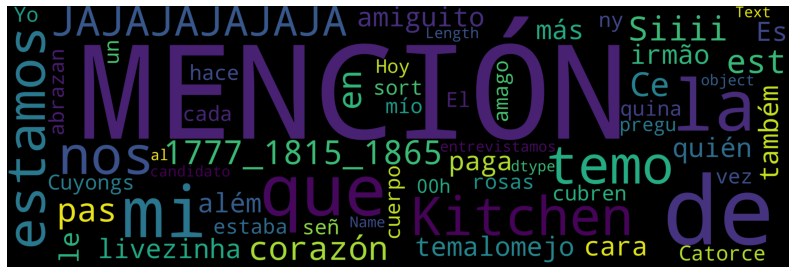

In [ ]:
# Global WC

WD = WordCloud(width = 9000, height = 3000,min_font_size = 10).generate(str(df['Text']))
fig = plt.figure(1, figsize=(14, 8))
plt.axis('off')
plt.imshow(WD)
plt.show()

## 3.1 ) FEELINGS ANALYSIS 

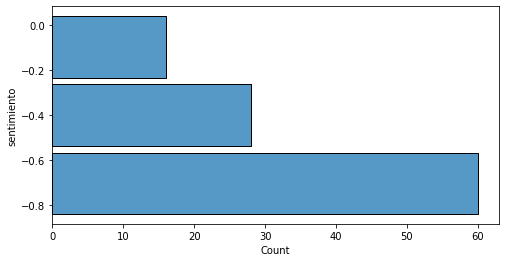

In [ ]:
# Histogram

plt.figure(figsize=(8,4))
sns.histplot(data=df, y="sentimiento", bins=3, shrink=.9)

If we consider that: 


*   A tweet is 'Positive' if it has a score between 0.2 and 1 --> [0.2, 1]
*   A tweet is 'Neutral' if it has a score between -0.2 and 0.2 --> (-0.2, 0.2)
*   A tweet is 'Negative' if it has a scote between -1 and -0.2 --> [-1, -0.2]

We can generate a plot like this: 



In [ ]:
def target(x):
  if (x >= 0.2) & (x <= 1):
    x = 'Positive'
  elif (x < 0.2) & (x > -0.2):
    x = 'Neutral'
  else:
    x = 'Negative'
  return x

df['target'] = df['sentimiento'].apply(target)
df.head()

,ID,Text,Created time,Screen name,Run time,sentimiento,Text_without_stopwords,target,temp_list
0,1405101850387521539,MENCIÓN Me temo que de la Kitchen nos estamos ...,2021-06-16 11:56:01+00:00,RaulGuzzoConteG,2021-06-16 11:55:44.050461,-0.816334,Me temo Kitchen enterando 0.3%.,Negative,"[Me, temo, Kitchen, enterando, 0.3%.]"
1,1405101856192401413,MENCIÓN MENCIÓN JAJAJAJAJAJA,2021-06-16 11:56:02+00:00,paumolla02,2021-06-16 11:55:44.050461,-0.829416,JAJAJAJAJAJA,Negative,[JAJAJAJAJAJA]
2,1405101876744425474,@1777_1815_1865 MENCIÓN MENCIÓN Ce n est pas l...,2021-06-16 11:56:07+00:00,pesiss,2021-06-16 11:55:44.050461,-0.718711,"@1777_1815_1865 Ce question, dire chaque fois ...",Negative,"[@1777_1815_1865, Ce, question,, dire, chaque,..."
3,1405101878057259009,MENCIÓN MENCIÓN Siiii en mi corazón temalomejo...,2021-06-16 11:56:07+00:00,GemaBallestero5,2021-06-16 11:55:44.050461,-0.840319,Siiii corazón temalomejordenuestramúsica,Negative,"[Siiii, corazón, temalomejordenuestramúsica]"
4,1405101880376705026,Es amiguito de quién le paga más.,2021-06-16 11:56:08+00:00,margaser1,2021-06-16 11:55:44.050461,-0.595210,Es amiguito quién paga más.,Negative,"[Es, amiguito, quién, paga, más.]"


In [ ]:
count = pd.DataFrame(df['target'].value_counts())
count

,target
Negative,91
Neutral,13


In [ ]:
fig = go.Figure(go.Funnel(
    y = count.index,
    x = count.target))

fig.show() 

#### 3.1.1) MOST FREQUENT WORDS: POSITIVE AND NEGATIVE
There is the possibility of knowing which are the most frequent words, both positive and negative.

In [ ]:
pos = df[df['target']== 'Positive']
neg = df[df['target']== 'Negative']

In [ ]:
df['temp_list'] = df['Text_without_stopwords'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])

temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Most Commun Word','Frequency']
temp.style.background_gradient(cmap='Blues')

,Most Commun Word,Frequency
0,hace,4
1,aquí,4
2,boycott,3
3,x,3
4,plus,3
5,vamos,3
6,twitter,3
7,temakerembürsın,2
8,4,2
9,19,2


### 3.2 ) HATE CURVE

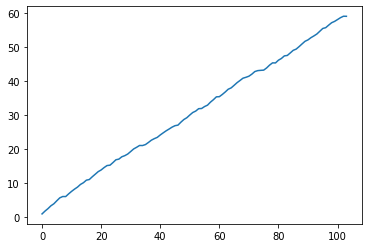

In [ ]:
df['sentimiento'].cumsum().plot()

# 4 ) HATE CURVE (TIME)

In [ ]:
# Select Frames the 30 min duration with 3 hours of separation 
# Load the CSV with tweets of interest


